In [ ]:
분류와 회귀의 큰 차이는 분류의 예측값은 카테고리형(범주형)이고 
회귀의 예측값은 연속형 숫자(int, float)라는 것이다.

회귀에서 학습이 얼마나 잘 되었는가를 평가하는 지표는 무엇인가?
MAE(Mean Absolte Error) : 시그마(|yi - y|) / n
MSE(Mean Squared Error) : 시그마(yi - y)^2 / n
RMSE

<AxesSubplot:>

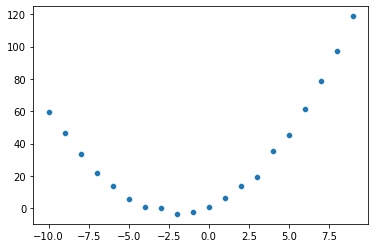

In [12]:
#2차식의 다항식으로 변환시켜서 다항회귀를 만들고 결론 내리기
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

# y = 1 + 4x + x**2

X = np.arange(-10,10)
y = 1 + 4*X + X**2 + np.random.randn(20)

sns.scatterplot(x = X,y = y)

In [16]:
X_ploy = PolynomialFeatures(degree=2), reshape(-1,1).fit_transform(X)

lr = LinearRegression()
lr.fit(X_ploy,y)

print(lr.coef_,lr.intercept_) 

NameError: name 'reshape' is not defined

In [ ]:
회귀 예측의 핵심을 주어진 피처와 결정 값 데이터 기반에서
학습을 통해 최적의 '회귀계수'을 찾아 내는 것이다.

규제를 적용한 모델 3가지
1. 릿지회귀 2. 라소회귀 3. 엘라스틱넷

In [ ]:
1. MSE에 루트를 씌운 것 -> RMSE
2. 실제값과 예측값의 차이를 절대값을 변환해 평균한 것 -> MAE
3. 실제값의 분산 대비 예측값의 분산 비율을 지표로 하며,
    1에 가까울수록 예측 정확도가 높다. -> R^2
4. 실제값과 예측값의 차이를 제곱 해 평균한 것 -> MSE

In [ ]:
Cost Function : 비용함수
Loss Function : 손실함수
Objective Function : 목적함수
Error Function : 오차함수 

In [ ]:
LinearRegression클래스는 예측값과 실제값의 RSS(잔차 제곱의 합)을 최소화하여

Ordinary Least Squares(일명, OLS)추정 방식으로 구현한 클래스이다.

OLS 기반의 회귀 계수 계산은 피처의 독립성에 많은 영향을 받는데,

피처간의 (____)가 매우 높은 경우 오류에 매우 민감해진다.
-> 상관관계

이러한 현상을 다중 공선성(multi-collinearity)이라 하며,

이와같은 경우 (_______)한 피처만 남기고 제거하거나 (___)를 적용한다
-> 중요한, 규제

In [ ]:
회귀모델에서 'MAE', 'MSE', 'RMSE'의 평가지표는 수치가 ()수록 잘 예측했다고 표현할까요?
-> 낮을수록

() 회귀는 회귀라는 이름이 붙어 있지만 ,사실은 분류에 사용되는 선형 모델이다.
-> 로지스틱선형회귀

릿지회귀는 alpha 값을 계속 증가시키면 회귀계수 값은 작아진다.(O)

In [ ]:
선형회귀에 L2 규제를 추가해 상대적으로 큰 회귀 계수 값의 예측 영향도가 감소된 모델은?
-> ridge

비용 함수에 alpha값으로 패널티를 부여해 회귀계수 값의 크기를 감소시켜
과적합을 개선하는 방식을 '규제'라고 한다.

# 로지스틱 회귀분석(Logistic Regression)

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

In [57]:
bike_df = pd.read_csv('train1.csv')
print(bike_df.shape)
bike_df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [58]:
# object 형은 몇 개?
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


object 형은 1개이다.

In [59]:
bike_df['datetime'] = bike_df['datetime'].astype('datetime64') 

pd.to_datetime(df['datatime']) 이것도 같은 방법

In [60]:
bike_df['year'] = bike_df.datetime.dt.year
bike_df['month'] = bike_df.datetime.dt.month
bike_df['day'] = bike_df.datetime.dt.day
bike_df['hour'] = bike_df.datetime.dt.hour 

In [63]:
# 상관도가 높아 예측을 저해할 우려가 있으므로 삭제.
drop_columns = ['datetime', 'casual', 'registered']
bike_df.drop(drop_columns, axis=1, inplace=True)

KeyError: "['datetime', 'casual', 'registered'] not found in axis"

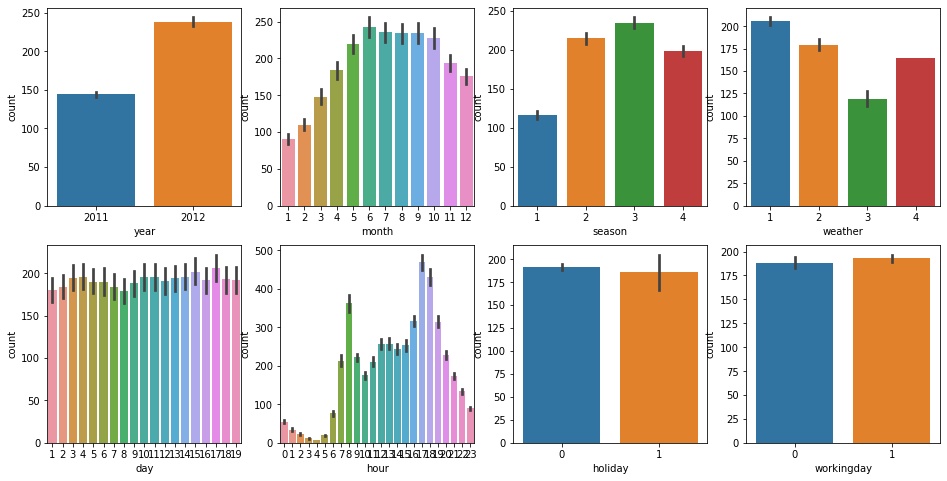

In [64]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
cat_features = ['year', 'month','season','weather','day', 'hour', 'holiday','workingday']
# cat_features에 있는 모든 칼럼별로 개별 칼럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4
    # 시본의 barplot을 이용해 칼럼값에 따른 count의 평균값을 표현
    sns.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col]) 

In [65]:
# MSE를 가져오기
from sklearn.metrics import mean_squared_error as mse

In [66]:
# 책으로 p368
y_target = bike_df['count']
X_features = bike_df.drop('count', axis=1)

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, np.log1p(y_target), test_size=.3, random_state=0)
#y_target을 로그로 변환해야지 에러가 안뜬다.

In [76]:
# LinearRegression으로 mse를 구하기
from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)

LinearRegression()

In [77]:
preds = lr_clf.predict(X_test)
mse(y_test, preds)

1.0339363308076817

In [78]:
# y_test와 preds를 로그변환해서 mse()를 구해라
np.mean((np.log1p(y_test) - np.log1p(preds))**2)

0.05373376942148224

In [79]:
mse(np.log1p(y_test), np.log1p(preds))

0.05373376942148225

In [82]:
np.expm1(preds)

array([308.63045453, 161.17120235, 146.5153226 , ..., 351.91134842,
       153.35179351,  74.17859374])

In [2]:
import pydataset
mpg = pydataset.data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [5]:
mpg.groupby('manufacturer')[['cty']].mean()

,cty
manufacturer,
audi,17.611111
chevrolet,15.000000
dodge,13.135135
ford,14.000000
honda,24.444444
hyundai,18.642857
jeep,13.500000
land rover,11.500000
lincoln,11.333333


In [10]:
# 제조사별 도시연비의 최댓값과 최솟값의 차이는?
mpg.groupby('manufacturer')['cty'].max() - mpg.groupby('manufacturer')['cty'].min()

manufacturer
audi           6
chevrolet     11
dodge          9
ford           7
honda          7
hyundai        5
jeep           8
land rover     1
lincoln        1
mercury        1
nissan        11
pontiac        2
subaru         3
toyota        17
volkswagen    19
Name: cty, dtype: int64

In [12]:
mpg.cty.max()

35

In [13]:
mpg.hwy.min()

12

In [15]:
df = mpg.groupby('manufacturer')[['cty', 'hwy']].agg({'cty': max, 'hwy':min}) 

<AxesSubplot:xlabel='manufacturer'>

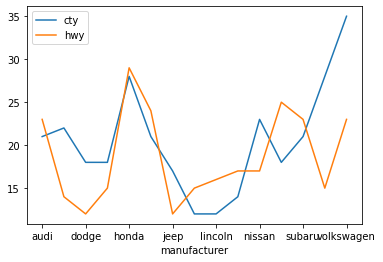

In [16]:
df.plot()

# 차원 축소 PCA 기법

In [17]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
iris = load_iris()
X = iris.data
y = iris.target

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #표준화 시킨 4개의 칼럼으로 바뀌었다.
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [21]:
#주성분으로 분석
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [23]:
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [25]:
pca.explained_variance_ratio_
# 2개의 값만 들어있다는 이야기는 위에 2개의 칼럼과 관련 있다.
# 이 2개의 합은 100%가 안된다. 약간 날라갔다는 뜻
# 앞의 것을 설명해주는 비율이다.
# 앞에 4개를 2개의 차원으로 줄여줬기 때문이다.

array([0.72962445, 0.22850762])

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rf_clf = RandomForestClassifier(random_state=156)
cross_val_score(rf_clf, X_pca, y, scoring='accuracy', cv=3)

array([0.88, 0.88, 0.88])

2차원 데이터를 3번을 돌렸는데 모두 0.88이 나왔다.

In [28]:
# 바뀌기 전의 모습
rf_clf = RandomForestClassifier(random_state=156)
cross_val_score(rf_clf, X_scaled, y, scoring='accuracy', cv=3)

array([0.98, 0.94, 0.96])

이건 4개짜리 원본이였으니 위에 비해서 값이 더 높다.

값이 높다고 좋은것은 아니다.(과적합 우려 때문에)

In [ ]:
pca라는 것이 차원을 몇 개의 변수로 잡아서 변환할것인가의 문제이고
사이킷런에서 n_components= 이걸로 차원을 바꿔준다.
주성분의 첫번째는 0.73, 두번째는 0.23으로 주성분은 당연히 첫번째가 더 높다.

In [32]:
df = pd.read_excel('default of credit card clients.xls', header = 1, sheet_name = 'Data').iloc[:,1:]
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [33]:
df.shape

(30000, 24)

In [34]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1) 

In [36]:
df.corr()  # 서로간의 상관도를 보여준다.

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_1,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


In [38]:
df.info() #BILL_AMT만 뽑아오기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [42]:
df_s = df.iloc[:, 11:17]
df_s

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131
...,...,...,...,...,...,...
29995,188948,192815,208365,88004,31237,15980
29996,1683,1828,3502,8979,5190,0
29997,3565,3356,2758,20878,20582,19357
29998,-1645,78379,76304,52774,11855,48944


In [ ]:
# 1) scaling을 하고 2) PCA 변환하고 3) LogisticRegression으로 분류. cv=5
# 4) PCA 변환이전에 대하여 LogisticRegression으로 분류

In [43]:
scalr = StandardScaler()

df_scaled = scaler.fit_transform(df_s)
df_scaled

array([[-0.64250107, -0.64739923, -0.66799331, -0.67249727, -0.66305853,
        -0.65272422],
       [-0.65921875, -0.66674657, -0.63925429, -0.62163594, -0.60622927,
        -0.59796638],
       [-0.29855966, -0.49389911, -0.48240819, -0.44973025, -0.41718767,
        -0.39162956],
       ...,
       [-0.64722711, -0.64383044, -0.63815838, -0.34796096, -0.32451732,
        -0.32768664],
       [-0.71798186,  0.41026929,  0.42237335,  0.14784373, -0.46806261,
         0.16913036],
       [-0.04473888, -0.00385085,  0.03966713, -0.10458204, -0.12966943,
        -0.39559241]])

In [44]:
pca = PCA(n_components=2)

df_pca = pca.fit_transform(df_scaled)
df_pca

array([[-1.61114812,  0.01247912],
       [-1.54759523, -0.06234401],
       [-1.03587378,  0.01125622],
       ...,
       [-1.19551872, -0.3595072 ],
       [-0.00829343, -0.04995798],
       [-0.25828552,  0.26525237]])

In [45]:
pca.explained_variance_ratio_

array([0.90555253, 0.0509867 ])

In [50]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
cross_val_score(lr, df_pca, y_target, scoring='accuracy', cv=5)

array([0.77866667, 0.77883333, 0.77883333, 0.77883333, 0.77883333])

In [52]:
# 바뀌기 전의 모습
lr = LogisticRegression()
cross_val_score(lr, X_features, y_target, scoring='accuracy', cv=5)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.77866667, 0.77883333, 0.77883333, 0.77883333, 0.77833333])